In [1]:
#import files
import os
import json
import pprint
import pandas as pd
import numpy as np
import requests

import json
import geojson
import folium

import sklearn

from folium.features import GeoJsonTooltip
from geopy.geocoders import Nominatim

import seaborn as sns
import matplotlib.pyplot as plt




In [3]:
#all are from consumerfinance.gov from 1.1.20XX to 12.31.20YY being load as debt_collect_XXYY 

#Product is Debt Collection, Focus on Untimely Response

# loading the json
with open("debt_complaints_untimely_response 2014-2022.json") as debt_collect:
    debt_collect = json.load(debt_collect) 

In [4]:
issue = []
company = []
company_response = []
complaint_long_desc = []
consumer_disputed =[]
state = []
zip_code = []
  
for x in range(len(debt_collect)): 
    company.append(debt_collect[x]['_source']['company'])
    issue.append(debt_collect[x]['_source']['issue'])
    company_response.append(debt_collect[x]['_source']['company_response'])
    consumer_disputed.append(debt_collect[x]['_source']['consumer_disputed'])
    state.append(debt_collect[x]['_source']['state'])
    zip_code.append(debt_collect[x]['_source']['zip_code'])

debt_df = pd.DataFrame({'issue': issue, "company":company, "company_response":company_response,"state":state, "zip_code": zip_code })


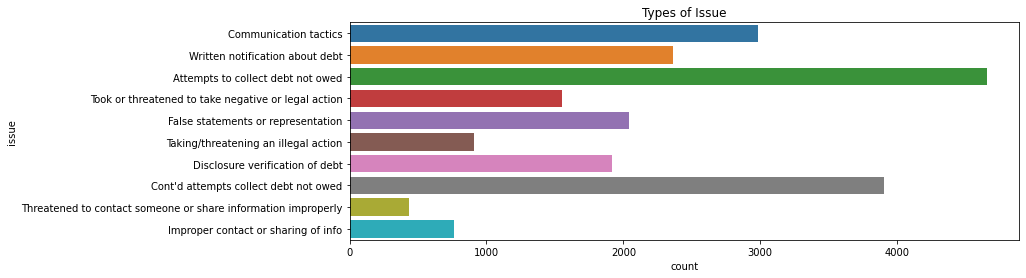

In [12]:
#color palete
sns.set_palette('tab10')

# Bar Plot 1
plt.figure(figsize=(12, 4))
sns.countplot(y='issue', data=debt_df)
    
plt.title('Types of Issue')
plt.show()
